The code for EIS data analysis

In [344]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.linear_model import LinearRegression
from pathlib import Path

First, we need to load the excel file and return the ExcelFile object.

In [365]:
def load_all_excel_sheets(folder_path):
    folder = Path(folder_path)
    excel_files = list(folder.glob("*.xlsx"))
    
    for file in excel_files:
        try:
            excel_obj = pd.ExcelFile(file)
            print(f"\n File: {file.name}")
            for sheet in excel_obj.sheet_names:
                print(f" Sheet: {sheet}")
        except Exception as e:
            print(f"Error reading {file.name}: {e}")

Extract multiple tables from sheet by using row-column ranges. Return list of DataFrames.

In [366]:
def extract_tables(file_path, sheet_name, table_ranges):
    sheet = pd.read_excel(file_path, sheet_name=sheet_name)
    tables = []
    for i, r in enumerate(table_ranges):
        df = sheet.iloc[r['start_row']:r['end_row'], r['start_col']:r['end_col']]
        df.columns = df.iloc[0]
        df = df[1:].reset_index(drop=True)  # Remove the header row from data
        tables.append(df)
        
        # Print the table
        print(f"\nTable {i+1}:")
        print(df)
        print("-" * 40)
    return tables

Plot customized graph using seaborn/maplotlib.

In [390]:
def plot_eis_table(table):

    #Choose and plot EIS graphs from a single table: Nyquist Plot, Bode Magnitude Plot, Bode Phase Plot
    print("\nChoose plot type:")
    print("1 = Nyquist Plot (Zre vs -Zim)")
    print("2 = Bode Magnitude |Z| vs Frequency")
    print("3 = Bode Phase vs Frequency")
    choice = input("Enter plot number (1, 2, or 3): ").strip()
        
    #Plot 1: Nyquist
    if choice == "1":
        x = "Zre (ohms)"
        y = "Zim (ohms)"
        title = "Nyquist Plot"

        if x not in table.columns or y not in table.columns:
            print(f"Missing required columns: '{x}' or '{y}'")
            return
        
        table = table.copy()
        table[y] = table[y] * -1

        # Scatter plot
        plt.figure(figsize=(8, 8))  
        sns.scatterplot(data=table, x=x, y=y)

        # Set X and Y axis limits to be equal, based on the min and max of both axes
        min_val = min(table[x].min(), table[y].min())
        max_val = max(table[x].max(), table[y].max(), table[x].max()*1.05)  # 5% larger than Zre max
        plt.xlim(min_val, max_val)
        plt.ylim(min_val, max_val)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.xlabel("Zre (ohms)")
        plt.ylabel("-Zim (ohms)")
        plt.title(title)
        plt.grid(True)
    #Plot 2: Bode Magnitude
    elif choice == "2":
        x = "Frequency (Hz)"
        y = "|Z| (ohms)"
        title = "Bode Magnitude Plot"
        if x not in table.columns or y not in table.columns:
            print(f"Missing required columns: '{x}' or '{y}'")
            return
        # Line plot
        plt.figure(figsize=(10, 6))
        sns.lineplot(data=table, x=x, y=y)
        plt.xscale('log')
        plt.xlabel(x)
        plt.ylabel(y)
        plt.title(title)
        plt.grid(True, which='both', ls='--')
        
    #Plot 3: Bode Phase
    elif choice == "3":
        x = "Frequency (Hz)"
        y = "Phase of Z (deg)"
        title = "Bode Phase Plot"
        if x not in table.columns or y not in table.columns:
            print(f"Missing required columns: '{x}' or '{y}'")
            return
        
        table_plot = table.copy()
        table_plot["-Phase"] = -table_plot[y]
        plt.figure(figsize=(10, 6))
        sns.lineplot(data=table_plot, x=x, y="-Phase")
        plt.xscale('log')
        plt.xlabel(x)
        plt.ylabel("-Phase of Z (deg)")
        plt.title(title)
        plt.grid(True, which='both', ls='--')
       
    else:
        print("Invalid choice.")
        return

    plt.tight_layout()
    plt.show()

In [391]:
folder_path = Path('/Users/WW/Desktop/corrosion-data-analysis-project/data/') #path to data folder

In [392]:
load_all_excel_sheets(folder_path)


 File: Sample_1_galvanized_steel.xlsx
 Sheet: Sheet1
 Sheet: Sheet2
 Sheet: Sheet3


In [393]:
file_path = Path('/Users/WW/Desktop/corrosion-data-analysis-project/data/Sample_1_galvanized_steel.xlsx')

In [394]:
table_ranges = [
    {"start_row": 1, "end_row": 10, "start_col": 0, "end_col": 5},  # first table
    {"start_row": 1, "end_row": 9, "start_col": 8, "end_col": 13}, # second table
    {"start_row": 1, "end_row": 9, "start_col": 17, "end_col": 22} #third table
]

In [395]:
sheet_name = "Sheet1"

In [396]:
tables = extract_tables(file_path ,sheet_name, table_ranges)


Table 1:
1 Frequency (Hz)  |Z| (ohms)  Zre (ohms) Zim (ohms) Phase of Z (deg)
0         100000   92.796086    84.14464   39.12535        24.937359
1          10000   77.349276   77.334623  -1.505497        -1.115254
2           1000   80.956415   80.767572   -5.52634        -3.914234
3            100   94.658011   94.344477  -7.697962         -4.66467
4             10  100.803185  100.801194  -0.633598        -0.360135
5              1   95.939909   95.921081   1.900639         1.135145
6            0.1   90.028285   90.028035   0.212399         0.135175
7           0.01   94.380184   94.380181   0.020685         0.012558
----------------------------------------

Table 2:
1 Frequency (Hz)  |Z| (ohms)  Zre (ohms) Zim (ohms) Phase of Z (deg)
0   12589.253906    77.10716   77.100862  -0.985553        -0.732351
1    1258.925415   78.763726   78.639321  -4.425121          -3.2207
2      125.89254   93.974352   93.152027  -12.40478        -7.585282
3      12.589254  108.090747  108.067032  

In [397]:
print(tables[2].columns)

Index(['Frequency (Hz)', '|Z| (ohms)', 'Zre (ohms)', 'Zim (ohms)',
       'Phase of Z (deg)'],
      dtype='object', name=1)



Choose plot type:
1 = Nyquist Plot (Zre vs -Zim)
2 = Bode Magnitude |Z| vs Frequency
3 = Bode Phase vs Frequency


Enter plot number (1, 2, or 3):  3


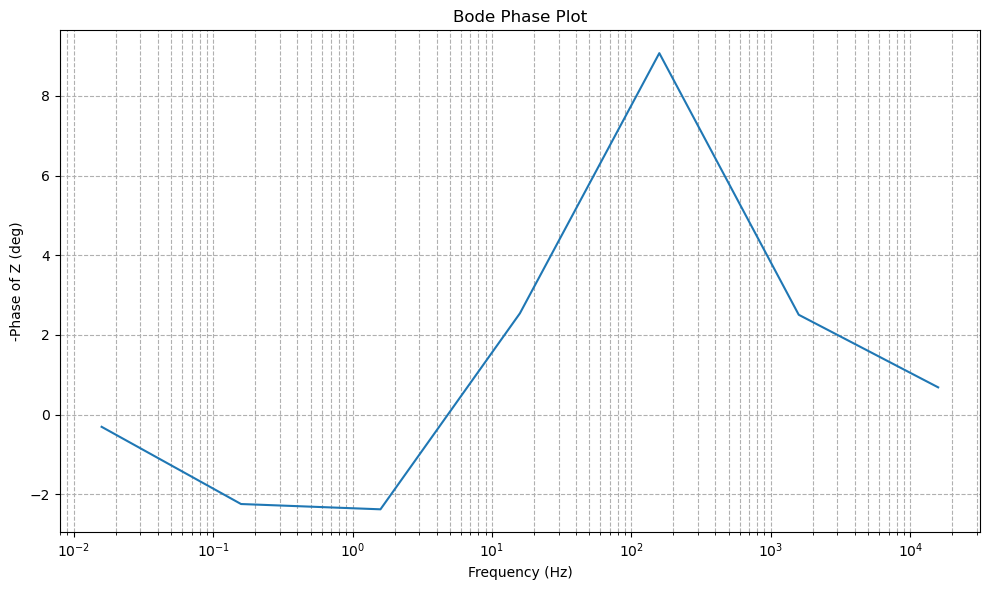

In [400]:
plot_eis_table(tables[2])